# <B> Lending Club Case Study </B>


### Problem Statement
The business problem is related to a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.
 

The data which is provided gives information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

### Business Objective:
The objective is to identify the risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 



### Data Understanding

##### Interpretation of Variables
<B>dti </B>(debt to income ratio)— It is one of the factors that affects one’s credit score and is essential to avail a loan.

A low dti ratio means shows one’s credit worthiness and improves chances to get fast loan approval and sanctioning.

<B>delinq_2yrs</B> --- Being delinquent refers to the state of being past due on a debt (for last two years in this case). Delinquency occurs as soon as a borrower misses a payment on a loan, which can affect his/her credit score.

<B>emp_length </B> -- It represents the length (number of years) of the employement of the customer.   

##### Data Quality Issues 
Various column headings are not clear (not abbreviated properly). Even the Data dictionary is not able to explain the meaning of some of the variable names.


##### Importing the required modules/packages and retrieving data from the CSV file
   

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv("C:/upg_casestudy1/loan_new.csv") 
#df=pd.read_csv("https://github.com/Jitendra-dua/LendingClubCaseStudy/blob/main/loan_new.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 110 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(23)
memory usage: 33.3+ MB
None


### Data Cleaning and Manipulation
 A. To check that which columns are totally blank and to delete them
 B. To check that which columns are 75% or more blank and to delete them
 C. To make the changes in the following fields:
        <B>emp_length </B>-- Following data cleaning operations are performed 
        on emp_length column:
           1. Removing '<' and '+' signs from the values.
           2. Removing the word 'years' from the values.
           3. Replacing NaN by zeros.
           4. Changing the data type to integer.
           

In [2]:
#To check that which columns are totally blank and to delete them
print("-"*40)
print("Initial status of columns")
print("-"*40)
print(round(100*(df.isnull().sum()/len(df.index)),2))
sr=df.isnull().sum(axis=0)
i=sr[sr==len(df.index)].index
df=df.drop(i,axis=1)
print("-"*40)
print("After deleting the empty columns")
print("-"*40)
print(round(100*(df.isnull().sum()/len(df.index)),2))

----------------------------------------
Initial status of columns
----------------------------------------
id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 110, dtype: float64
----------------------------------------
After deleting the empty columns
----------------------------------------
id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                    

In [3]:
#To check the existing columns and to delete the columns which are nearly empty 

sr=df.isnull().sum(axis=0)
#To identify the columns with more than 75% NaN values
i=sr[sr>len(df.index)*3/4].index 
df=df.drop(i,axis=1)
print("-"*60)
print("After deleting the columns with more than 75%  NaN values")
print("-"*60)
print(round(100*(df.isnull().sum()/len(df.index)),2))

------------------------------------------------------------
After deleting the columns with more than 75%  NaN values
------------------------------------------------------------
id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                  

In [4]:
#Removing 'less than' sign from the values of emp_length field:
df['emp_length']=df['emp_length'].str.replace('<','')
df['emp_length']=df['emp_length'].str.replace('+','')
df['emp_length']=df['emp_length'].str.replace('years','')
df['emp_length']=df['emp_length'].str.replace('year','')
#Replacing NaN values by 0
df['emp_length']=df['emp_length'].fillna(0)
#Changing the data type to int
df['emp_length']=df['emp_length'].astype("int")

print(df.emp_length)

0        10
1         1
2        10
3        10
4         1
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length, Length: 39717, dtype: int32


##### Plotting the Annual Income for getting the median value and quartiles. Also treating the outliers.

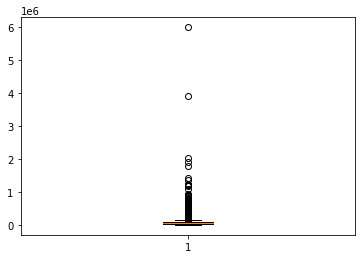

The median of annual_inc is  59000.0
The 75% amd 25% quartiles are
   annual_inc
0     82300.0
1     40404.0
            id  annual_inc
1463   1050329    525000.0
1808   1045841    550000.0
5168    989796    725000.0
5304    987778    500000.0
7247    884755   1782000.0
...        ...         ...
38691   347541    500000.0
39089   269818   2039784.0
39098   268516    572400.0
39438   198952    522000.0
39554   157169    616000.0

[72 rows x 2 columns]
No of records as outliers 72


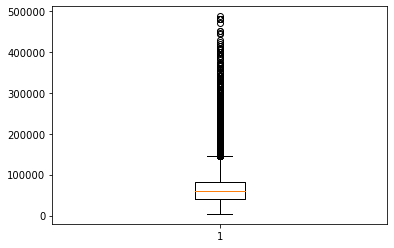

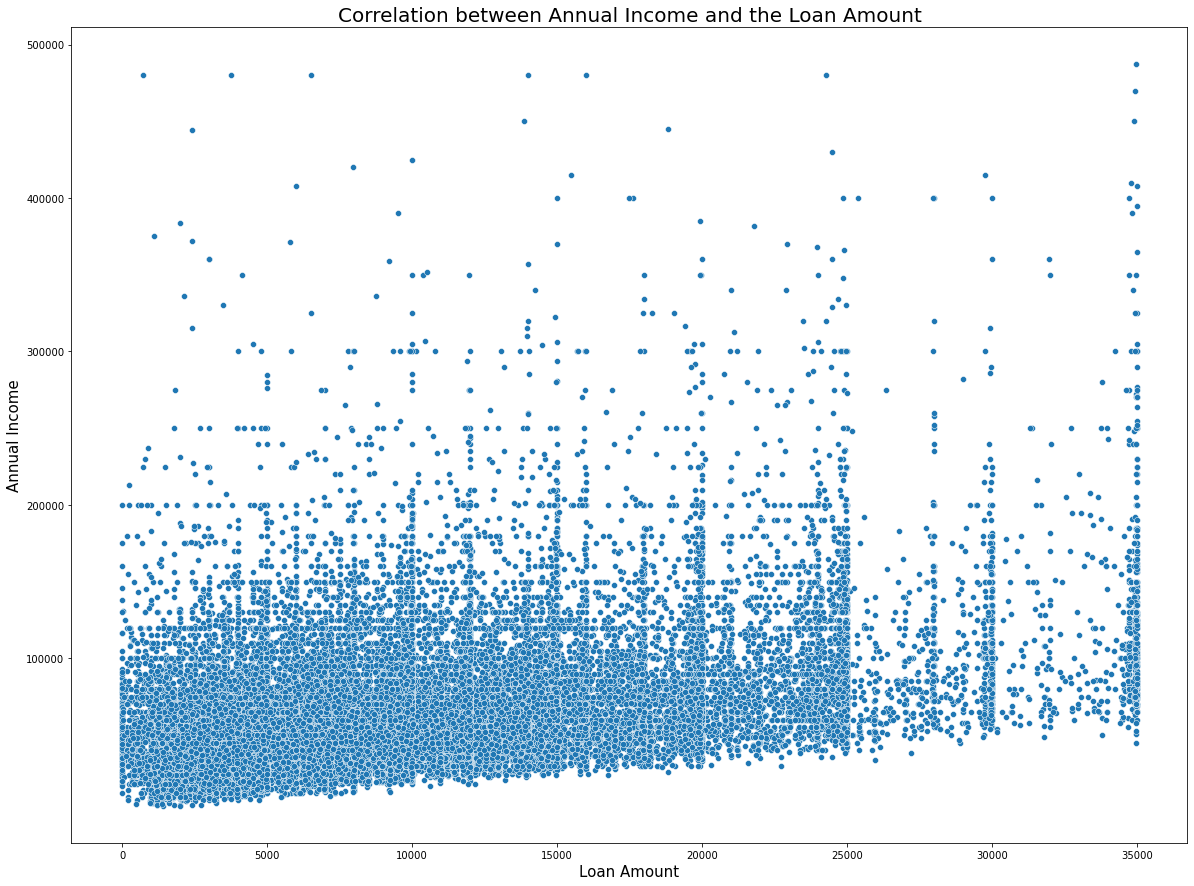

In [5]:
plt.boxplot(df.annual_inc)
plt.show()

print("The median of annual_inc is ",df.annual_inc.median())

def find_quartiles(x):
    return (np.percentile(x, [75, 25]))

#Calculate quartiles for 'loan_amount' column
print("The 75% amd 25% quartiles are"  )
print(df[['annual_inc']].apply(find_quartiles))

print(df[df.annual_inc>=500000].loc[:,['id','annual_inc']])
#Records in which the annual_inc is exceeding 1000000
print("No of records as outliers",len(df[df.annual_inc>=500000].index))

#Removing the above  records (outliers) by filtering temporarily (only for analysis)
df=df[~(df.annual_inc>=500000)]

#Now checking the box plot after the above treatment of outliers
plt.boxplot(df.annual_inc)
plt.show()

plt.figure(figsize=(20,15))

sns.scatterplot(df.funded_amnt_inv,df.annual_inc)

plt.yticks(range(100000,500001,100000))
plt.title("Correlation between Annual Income and the Loan Amount",fontsize=20)
plt.xlabel("Loan Amount",fontsize=15)
plt.ylabel("Annual Income",fontsize=15)
plt.show()




<B>Analysis: </B>The above scatter graph shows the correlation between Annual Income and the Loan Amount.
    The outliers are removed.It shows a linear progression.

<B>Analysis: </B>The above boxplot shows that the even big size loan amounts are present in the data which are above 75% percentile (i.e. they are the outlliers). So the outliers are discarded by checking 25% percentile and 75% percentile.

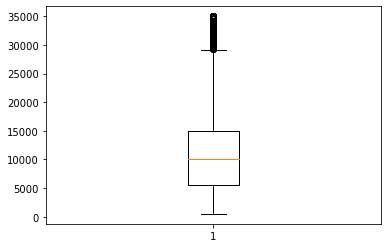

The 75% amd 25% quartiles are
   loan_amnt
0    15000.0
1     5500.0
The median of loan_amnt is  10000.0


In [6]:
plt.boxplot(df.loan_amnt)
plt.show()

def find_quartiles(x):
    return (np.percentile(x, [75, 25]))

#Calculate quartiles for 'loan_amount' column
print("The 75% amd 25% quartiles are"  )
print(df[['loan_amnt']].apply(find_quartiles))


'''The interquartile range (IQR), is the spread of the middle 50% of a
dataset (loan amount).
It is the difference between the first quartile (the 25th percentile) and 
the third quartile (the 75th percentile)of the data. '''



#The median of the loan_amnt values is as follows 
print("The median of loan_amnt is ",df.loan_amnt.median())


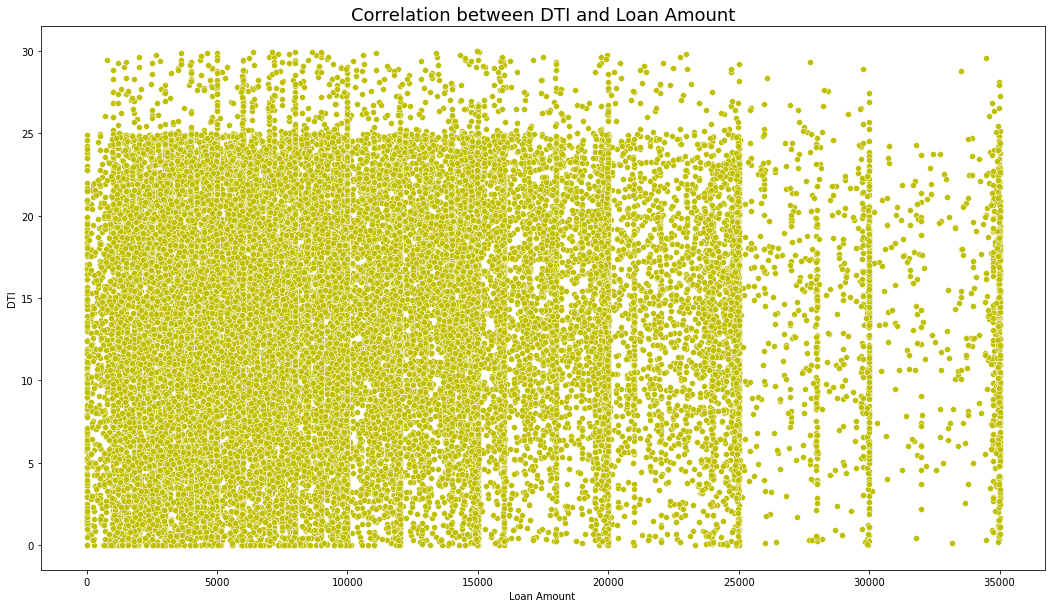

In [7]:
plt.figure(figsize=(18,10))

sns.scatterplot(df.funded_amnt_inv,df.dti,color="y")
plt.title("Correlation between DTI and Loan Amount",fontsize=18)
plt.xlabel("Loan Amount ")
plt.ylabel("DTI")
plt.show()

# dti (debt to income ratio)



### Analyses of various variables (Univariate and Bivariate) along with Data Visualisation (plots)

 36 months    29044
 60 months    10601
Name: term, dtype: int64


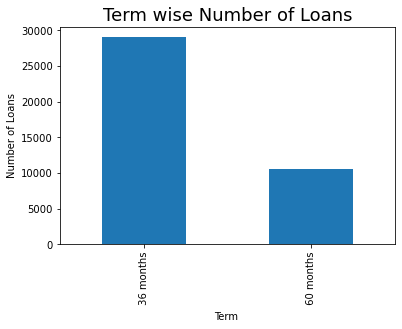

In [8]:
#Term wise count of records

print(df['term'].value_counts())
df['term'].value_counts().plot.bar()

plt.title("Term wise Number of Loans",fontsize=18)
plt.xlabel("Term ")
plt.ylabel("Number of Loans")
plt.show()

In [9]:
#Term wise count of records and affect on the getting the loan defaulted
gdf=df.groupby(["term",'loan_status'])
print(gdf[['loan_status']].count())


                        loan_status
term       loan_status             
 36 months Charged Off         3221
           Fully Paid         25823
 60 months Charged Off         2395
           Current             1139
           Fully Paid          7067


5000.000000     1307
10000.000000    1274
6000.000000     1198
12000.000000    1067
8000.000000      899
                ... 
19699.811060       1
10854.668760       1
8830.335720        1
9991.532962        1
24632.987540       1
Name: funded_amnt_inv, Length: 8188, dtype: int64


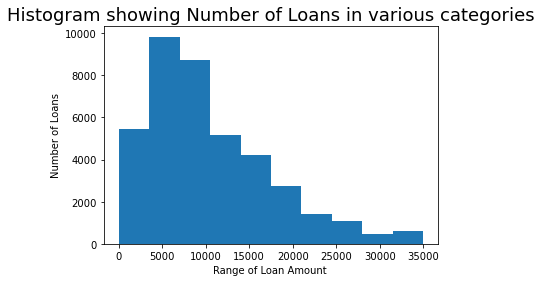

In [10]:
print(df['funded_amnt_inv'].value_counts())
plt.hist(df['funded_amnt_inv'])
plt.title("Histogram showing Number of Loans in various categories",fontsize=18)
plt.xlabel("Range of Loan Amount ")
plt.ylabel("Number of Loans")
plt.show()

In [11]:
#Term wise count of records and affect on the getting the loan defaulted
gdf=df.groupby(['loan_status','funded_amnt_inv'])
print(gdf[['loan_status']].count())


                             loan_status
loan_status funded_amnt_inv             
Charged Off 0.000000                  27
            0.000121                   1
            0.000531                   1
            0.000655                   1
            0.001868                   1
...                                  ...
Fully Paid  34990.430800               1
            34993.196960               1
            34993.325710               1
            34993.655390               1
            35000.000000             104

[9353 rows x 1 columns]


In [12]:
#Funded_amnt_invwise count of records

print(df['funded_amnt_inv'].value_counts())
#df['funded_amnt_inv'].value_counts().plot.bar() WRONG
plt.show()


5000.000000     1307
10000.000000    1274
6000.000000     1198
12000.000000    1067
8000.000000      899
                ... 
19699.811060       1
10854.668760       1
8830.335720        1
9991.532962        1
24632.987540       1
Name: funded_amnt_inv, Length: 8188, dtype: int64


RENT        18878
MORTGAGE    17613
OWN          3054
OTHER          97
NONE            3
Name: home_ownership, dtype: int64


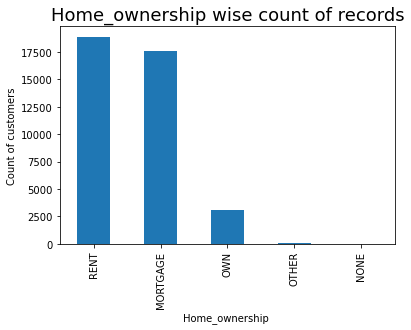

In [13]:
#Home_ownership wise count of records
print(df['home_ownership'].value_counts())
df['home_ownership'].value_counts().plot.bar()
plt.title("Home_ownership wise count of records",fontsize=18)
plt.xlabel("Home_ownership ")
plt.ylabel("Count of customers")
plt.show()


loan_status
Charged Off    10856.925247
Current        16310.643004
Fully Paid     10107.428128
Name: funded_amnt_inv, dtype: float64


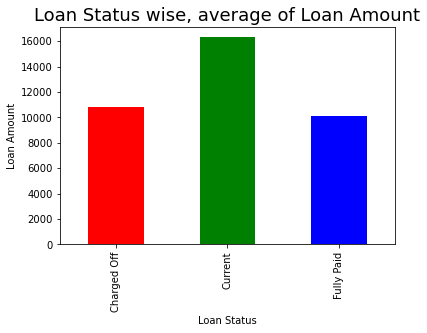

In [14]:
#Loan Status wise, average(mean ) of the loan amount 
gdf=df.groupby("loan_status")
print(gdf['funded_amnt_inv'].mean())
gdf['funded_amnt_inv'].mean().plot.bar(color=["r","g","b"])
plt.title("Loan Status wise, average of Loan Amount",fontsize=18)
plt.xlabel("Loan Status")
plt.ylabel("Loan Amount")
plt.show()

loan_status
Charged Off    61167.619692
Current        74926.214416
Fully Paid     68253.299503
Name: annual_inc, dtype: float64


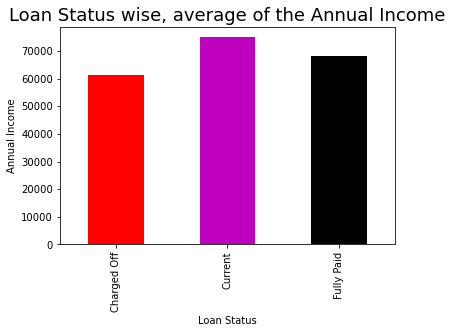

In [15]:
#Loan Status wise, average(mean ) of the Annual Income 
gdf=df.groupby("loan_status")
print(gdf['annual_inc'].mean())
gdf['annual_inc'].mean().plot.bar(color=["r","m","k"])
plt.title("Loan Status wise, average of the Annual Income",fontsize=18)
plt.xlabel("Loan Status")
plt.ylabel("Annual Income")
plt.show()

loan_status
Charged Off    335.815691
Current        395.250395
Fully Paid     319.925616
Name: installment, dtype: float64


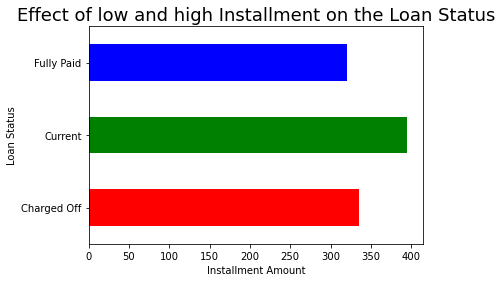

In [16]:
#Effect of low and high Installment on the Loan Status 
gdf=df.groupby("loan_status")
print(gdf['installment'].mean())
gdf['installment'].mean().plot.barh(color=["r","g","b"])
plt.title("Effect of low and high Installment on the Loan Status",fontsize=18)
plt.xlabel("Installment Amount")
plt.ylabel("Loan Status")
plt.show()

##### Insight: More chances of loan default in case of higher installment

loan_status
Charged Off    4.986645
Current        5.923617
Fully Paid     4.912283
Name: emp_length, dtype: float64


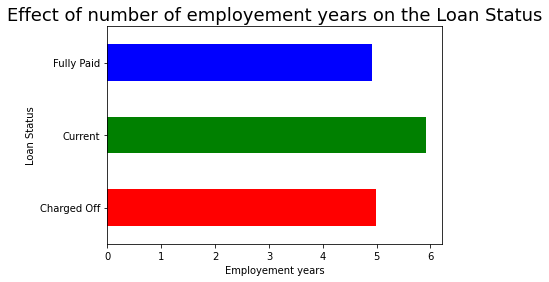

In [17]:
#Effect of number of employement years on the Loan Status 
gdf=df.groupby("loan_status")
print(gdf['emp_length'].mean())
gdf['emp_length'].mean().plot.barh(color=["r","g","b"])
plt.title("Effect of number of employement years on the Loan Status",fontsize=18)
plt.xlabel("Employement years")
plt.ylabel("Loan Status")
plt.show()